#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Manifold learning

## Kernel PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import norm

from sklearn.decomposition import KernelPCA

# por esta ocasion, no pongo las graficas inline, para poder mostrarlas en un slide aparte...
#%matplotlib inline
plt.ioff() # pongo Interactive Mode Off
plt.style.use('ggplot') 

### Caracterización con un kernel Gaussiano.

#### Unos datos sintéticos en 1D

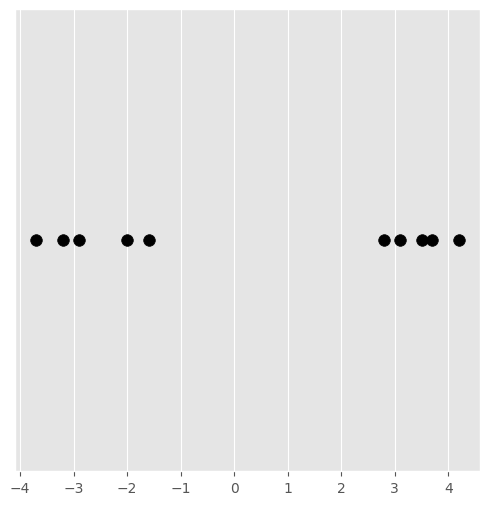

In [5]:
x1 = [-3.7,-2,-3.2,-2.9,-1.6]
x2 = [4.2,2.8,3.7,3.5,3.1]
data = np.array(x1 + x2)
data = np.reshape(data,(-1,1))
plt.rcParams['figure.figsize'] = (6, 6)

plt.scatter(data,np.zeros([len(data),1]),s=70,c='black')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

Realizo Kernel PCA

In [7]:
sigma = .8
kpca = KernelPCA(n_components=None, kernel='rbf', gamma=1/sigma)
scores_kpca = kpca.fit_transform(data)
# los vectores propios de K, es decir, los alphas
np.round(kpca.eigenvectors_,2)

array([[ 0.31, -0.37, -0.  ,  0.73, -0.12,  0.25, -0.01, -0.25, -0.01],
       [ 0.27,  0.54, -0.02, -0.13, -0.05,  0.68,  0.01,  0.24,  0.  ],
       [ 0.38, -0.37, -0.01, -0.15, -0.03, -0.29,  0.03,  0.71,  0.01],
       [ 0.38, -0.22, -0.01, -0.6 ,  0.04, -0.02, -0.03, -0.59, -0.01],
       [ 0.21,  0.61, -0.01,  0.24, -0.07, -0.63, -0.  , -0.14, -0.  ],
       [-0.21, -0.01,  0.63,  0.05,  0.63,  0.01,  0.23,  0.01,  0.09],
       [-0.26, -0.03, -0.57,  0.04,  0.48,  0.01, -0.49,  0.03,  0.16],
       [-0.35, -0.05,  0.32, -0.07, -0.34, -0.  , -0.5 ,  0.03, -0.55],
       [-0.38, -0.05,  0.07, -0.08, -0.48, -0.  ,  0.07, -0.01,  0.71],
       [-0.34, -0.05, -0.4 , -0.03, -0.07,  0.  ,  0.67, -0.02, -0.4 ]])

Mi funcion para estimar la densidad *centrada* en cada dato de prueba

In [8]:
def my_rbf(x,y,s):
    f = x-y
    m = np.mean(np.exp(-f**2)/(2*s**2))
    return m

Probaremos las proyecciones con distintos valores de $\alpha$, pero deben cumplir la restricción de norma unitaria y de suma igual a cero. En este caso, usaremos las $\alpha$'s correspondientes a distintos componentes principales obtenidos con K-PCA. Observa el resultado y la varianza obtenida con cada uno de ellos.

NOTA: recuerda que los $\alpha$ están estandarizados respecto a su valor propio. Checa tus notas...

In [13]:
ncomp = 2
proj = scores_kpca[:,ncomp]

dens = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    dens[i] = my_rbf(data,data[i],sigma)

s = (scores_kpca[:,ncomp]-dens)**2
var = np.sum(s)
print('Varianza total con el componente '+str(ncomp+1)+': '+str(round(var,2)))

Varianza total con el componente 3: 1.86


Visualizo los resultados. Pongo las estimacion de Parzen (centrada en cada punto), pero  le pongo un factor de correción para que quede centrado en 0. Observa que la solución está centrada *en el espacio de características*, pero los datos de prueba (secuencia de valores negativos y positivos no tiene promedio cero, ya que es solo una proyección basada en la solución encontrada y construida con los datos de prueba

In [14]:
n = len(data)
# datos de prueba
test_data = np.arange(min(data)-3, max(data)+3, step = .01)
# densidades
den_test = np.zeros([n, len(test_data)])
for i in range(n):
    den_test[i,:] = norm.pdf(test_data,data[i],sigma)

## densidades pesadas por alpha
den_test_alpha = den_test * np.reshape(kpca.eigenvectors_[:,ncomp],(-1,1))
## proyecciones de los datos de prueba con Kernel PCA
proj_test = kpca.transform(np.reshape(test_data,(-1,1)))
mean_projtest = np.mean(proj_test[:,ncomp])

/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_10793/3597277978.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_data = np.arange(min(data)-3, max(data)+3, step = .01)


Text(0.5, 1.0, 'Función de Proyección \nVarianza total con el componente 1: 1.86')

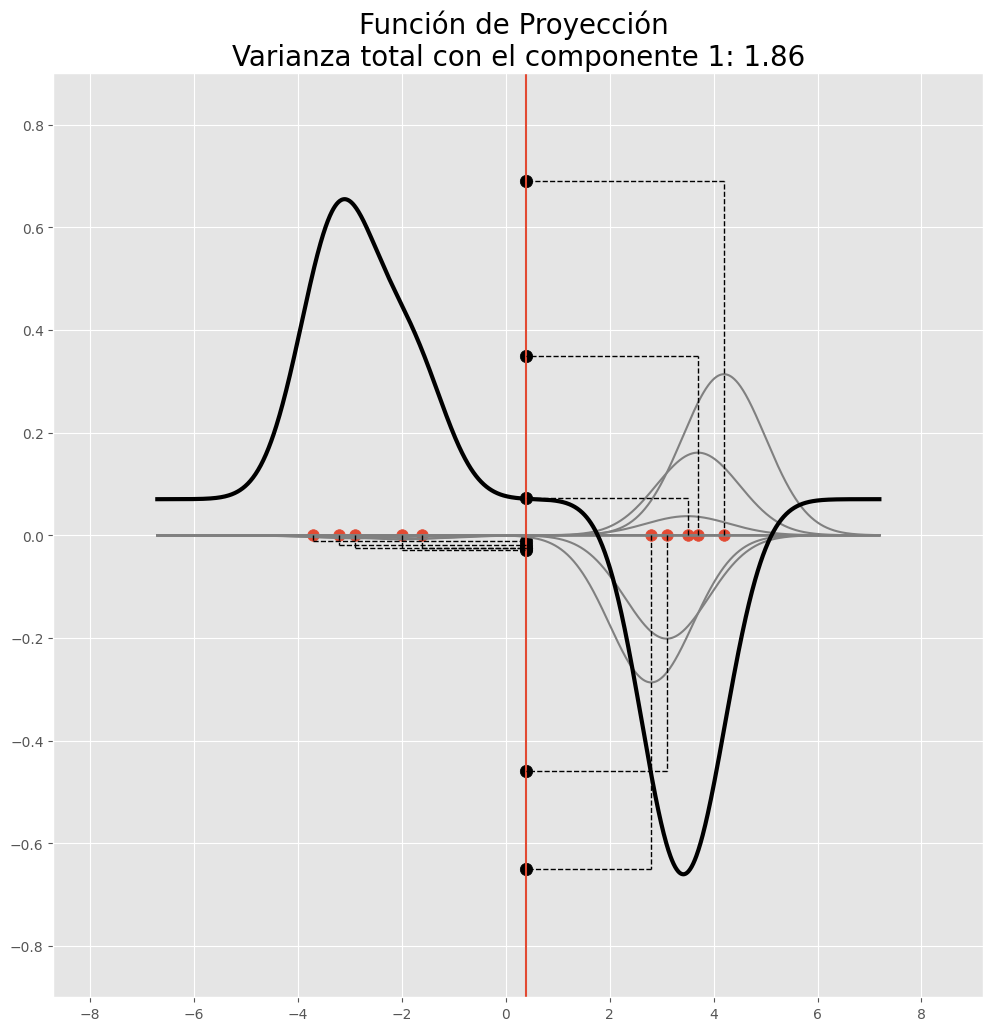

In [30]:
plt.rcParams['figure.figsize'] = (12, 12)

plt.plot(test_data,den_test_alpha[0,:],c='gray')
plt.xlim([min(test_data)-2, max(test_data)+2])
plt.ylim([-.9,.9])
for i in range(1,n):
    plt.plot(test_data,den_test_alpha[i,:],c='gray')

plt.scatter(data,np.zeros([n,1],dtype=object),s=70)

## Pongo la funci'on de proyecci'on f_alpha(.)
plt.plot(test_data,proj_test[:,ncomp]-mean_projtest,linewidth=3,c='black')
plt.axvline(x=np.mean(data))

## aqui grafico la proyecci'on correspondiente de cada dato de prueba...
## y ver el efecto de maximizaci'on de varianza
for i in range(n):
    plt.plot([data[i].item(),data[i].item()], [0, proj[i].item()-mean_projtest],c='black',linestyle='--',linewidth=1)
    plt.plot([data[i].item(),np.mean(data)], [proj[i].item()-mean_projtest,proj[i]-mean_projtest],c='black',
             linestyle='--',linewidth=1)

plt.scatter(np.full((n,1),np.mean(data)),proj-mean_projtest,c='black',s=80)
txt = 'Varianza total con el componente '+str(ncomp+1)+': '+str(round(var,2))
plt.title('Función de Proyección \n'+txt,size=20)

In [17]:
plt.show()

#### Ejemplo en 2D

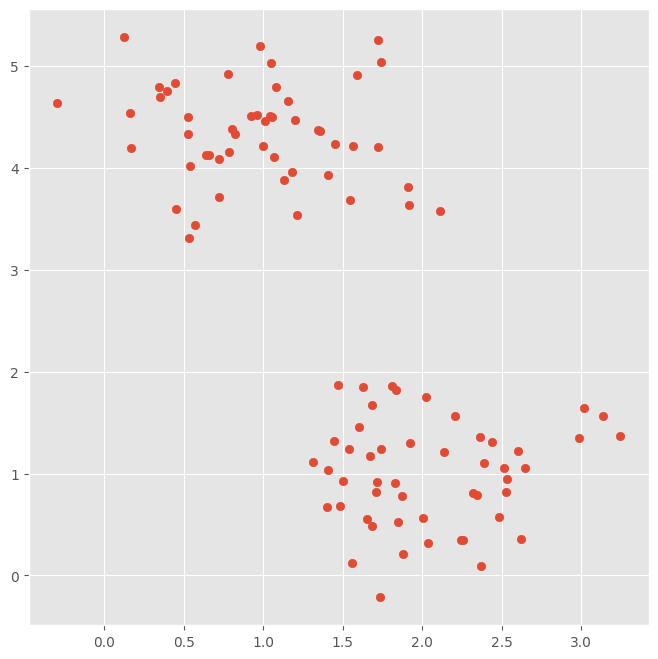

In [18]:
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (8, 8)
# toy dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:,0],X[:,1])
plt.show()

Como el ejemplo anterior, haremos una visualización de la proyección de algún componente principal de Kernel PCA en un ***grid*** de puntos equidistantes. Estos serán nuestros datos de prueba

In [19]:
num = 30
# el rango de valores
xrange = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, num = num)
yrange = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, num = num)
## hago el grid
xx, yy = np.meshgrid(xrange, yrange)
mesh = np.column_stack((np.reshape(xx,(-1,1)),np.reshape(yy,(-1,1))))
mesh[:5,]

array([[-1.30022483, -1.21403792],
       [-1.10894673, -1.21403792],
       [-0.91766864, -1.21403792],
       [-0.72639055, -1.21403792],
       [-0.53511245, -1.21403792]])

Realizo Kernel PCA

In [20]:
sigma = .5
ncomp = 0
# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma).fit(X)
# Proyecto nuestros datos de prueba (el grid) en el componente principal 'ncomp'
mesh_kpca = kpca.transform(mesh)
# ajusto las proyeccions para un grid
Z = np.reshape(mesh_kpca[:,ncomp],(-1,num))

Visualización

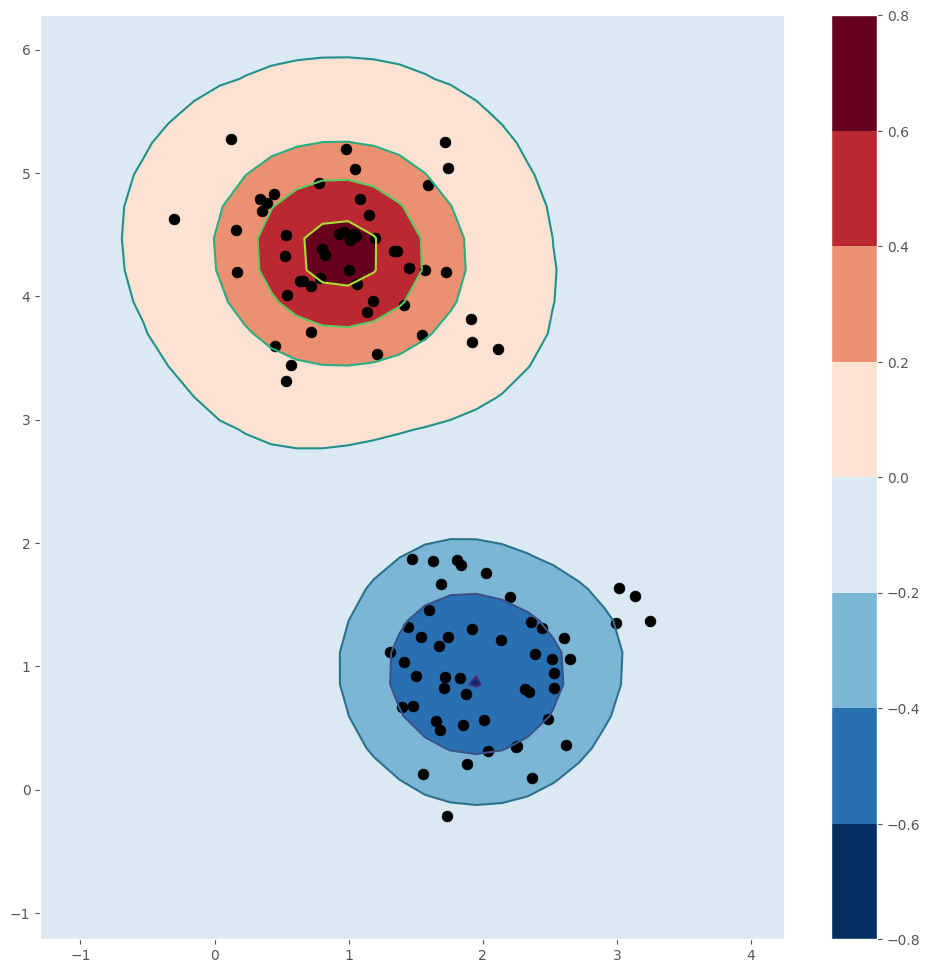

In [21]:
from matplotlib import cm
plt.rcParams['figure.figsize'] = (12, 12)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.RdBu_r
plt.contour(xx,yy,Z)
plt.contourf(xx,yy,Z,norm=norm, cmap=cmap)
plt.colorbar()
plt.scatter(X[:,0],X[:,1], s=60, c='black');